In [1]:
import preprocessing_pipeline_final as pp

In [2]:
import pandas as pd

df = pd.read_csv(r"data_mining\data.csv")
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [3]:
df = pp.preprocessing_pipeline()


In [4]:
df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,...,has_heated_seats,has_leather_interior,has_navigation,has_panoramic_roof,has_sport_features,has_trailer_hitch,has_tuev,is_cabrio,is_combi,is_coupe
322,alfa-romeo,Alfa Romeo Giulietta,grey,2010,8970,125.0,170.0,Manual,Petrol,6.4,...,False,True,True,False,False,False,False,False,False,False
323,alfa-romeo,Alfa Romeo Giulietta,grey,2010,6500,125.0,170.0,Manual,Petrol,6.4,...,False,False,False,False,False,False,False,False,False,False
325,alfa-romeo,Alfa Romeo Giulietta,red,2010,7990,125.0,170.0,Manual,Diesel,4.9,...,False,False,False,False,False,False,False,False,False,False
326,alfa-romeo,Alfa Romeo Giulietta,red,2010,6900,88.0,120.0,Manual,Petrol,6.6,...,False,False,False,False,False,False,False,False,False,False
330,alfa-romeo,Alfa Romeo Giulietta,black,2010,6650,88.0,120.0,Manual,Petrol,6.6,...,False,False,False,False,False,False,False,False,False,False


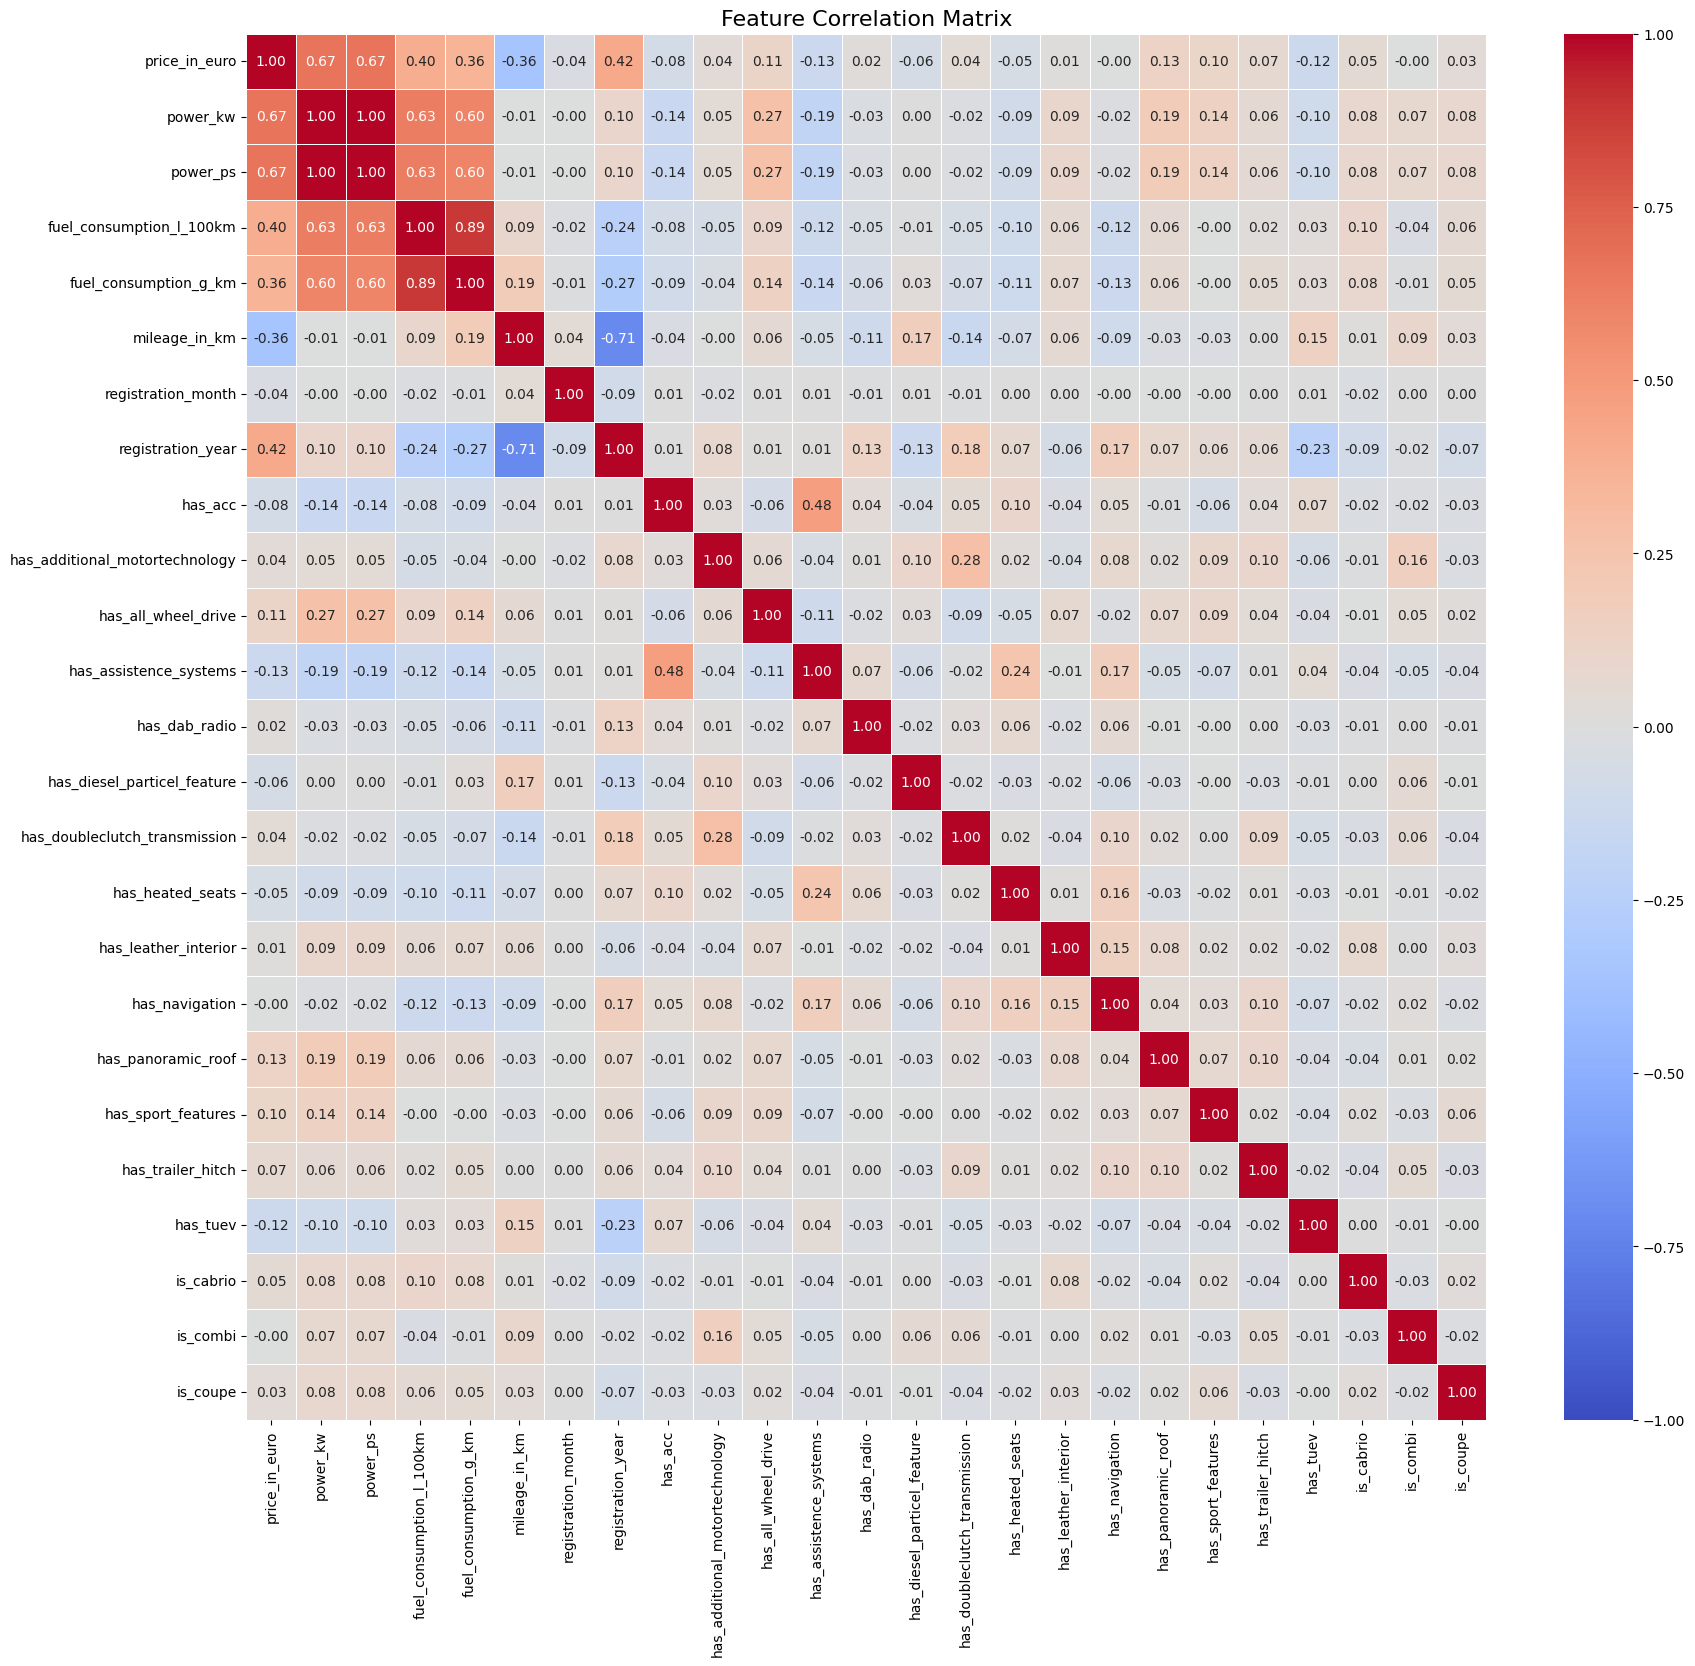

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Letzte 17 Spalten auswählen
offer_descriptions_new = df.iloc[:, -17:]

# In int umwandeln
df.iloc[:, -17:] = offer_descriptions_new.astype(int)

# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()





Es lassen sich leichte positive und negative Korrelationen durch die hinzugefügten Spalten feststellen:
- leichte negative Korrelation (0.23) zwischen registration_year und has_tuev
- leichte positive Korrelationen (0.28) zwischen has_doubleclutch_transmission und has_additional_motortechnology
- leichte positive Korrelationen zwischen has_sport_features und power_kw / power_ps
- positive Korrelationen (0.48, 0.24) zwischen has_assistence_systems, has_acc und has_shz
- bezogen auf den Preis (price_in_euro): sehr leichte negative korrelation mit has_tuev (contraintuitiv), has_assistance system (auch contraintuitiv), leichte positive korrelationen mit has_all_wheel_drive, has_panoramic_roof, has_sport_features

In [14]:
df[df["has_tuev"] == True].count()

brand                             5003
model                             5003
color                             5003
year                              5003
price_in_euro                     5003
power_kw                          5003
power_ps                          5003
transmission_type                 5003
fuel_type                         5003
fuel_consumption_l_100km          5003
fuel_consumption_g_km             5003
mileage_in_km                     5003
offer_description                 5003
registration_month                5003
registration_year                 5003
offer_description_cleaned         5003
has_acc                           5003
has_additional_motortechnology    5003
has_all_wheel_drive               5003
has_assistence_systems            5003
has_dab_radio                     5003
has_diesel_particel_feature       5003
has_doubleclutch_transmission     5003
has_heated_seats                  5003
has_leather_interior              5003
has_navigation           

In [22]:
df[df["has_tuev"] ==1][["registration_year", "has_tuev"]].value_counts()

registration_year  has_tuev
2009               1           490
2010               1           378
2012               1           360
2011               1           344
2013               1           332
2006               1           316
2014               1           307
2007               1           302
2005               1           293
2008               1           286
2015               1           250
2016               1           216
2004               1           195
2003               1           164
2017               1           163
2018               1           163
2002               1           113
2019               1            87
2001               1            80
2000               1            57
1999               1            37
2020               1            30
1998               1            13
1997               1            11
2021               1             7
1995               1             4
1996               1             2
2023               1       

Die Meisten Autos, die TüV angegeben haben, sind "mittelalt".
Sehr alte und sehr neue Autos, haben seltener eine Angabe gemacht bzw. vielleicht auch wirklich keinen TüV. 
--> Nicht sehr aussagekräftig

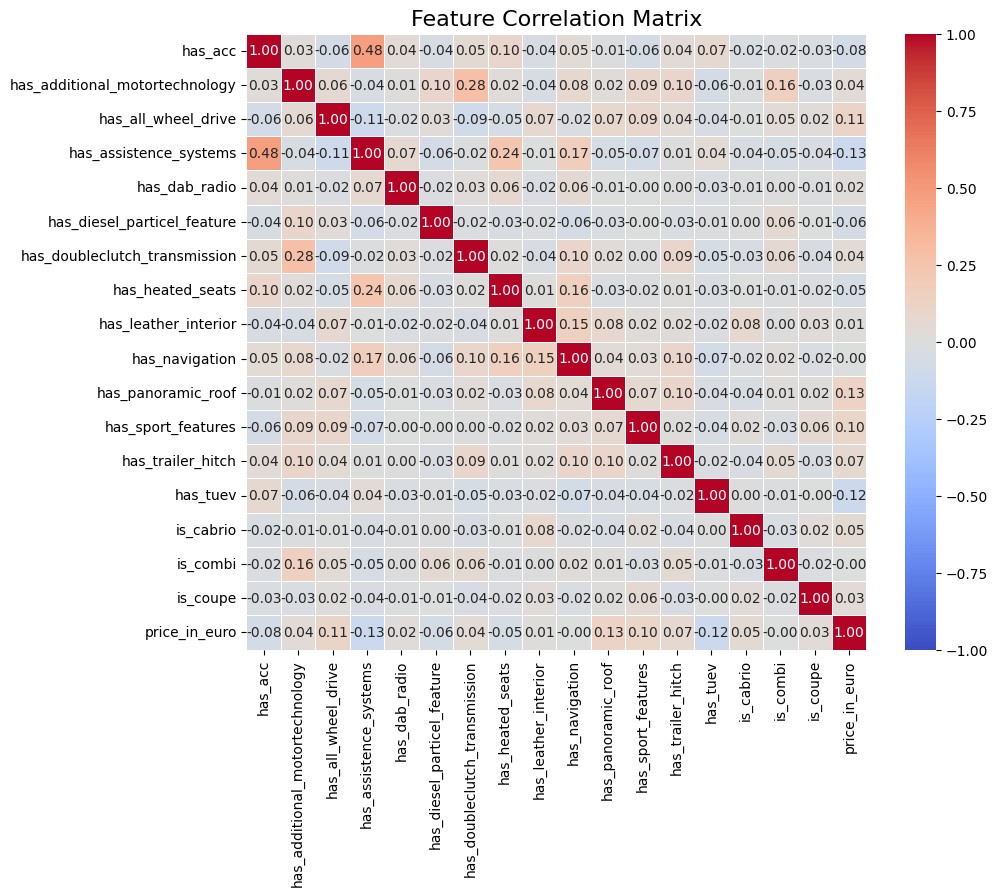

In [9]:
# Letzte 17 Spalten + 'preis_in_euro' auswählen
auswahl = df.iloc[:, -17:].copy()
auswahl["price_in_euro"] = df["price_in_euro"]

# Korrelationsmatrix berechnen
corr_matrix2 = auswahl.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()
